# S&P 500 Stock Data Visualization 


## DATA 601: Fall 2020

### By Yuangang Tong, Jia Zhou, Graeme Kempthorne 

#### Introduction
One of the most monitored values in the world is the S&P 500 equity Index. The S&P 500 itself is simply a collection of stocks and holdings that cover 500 of the largest American companies. The selection of the companies included within this index is decided by a committee according to their own internal standards. The value of the S&P 500 gets updated through the combined change of the individual stocks and their relative weighting within the index. Because of the immense amount of capital generated by these companies, many people track this index as an indicator of the overall economic health or to identify other factors that might be operating in the American financial markets. This index is also important to people here in Canada because many of the companies operate internationally and generate large amounts of capital across many borders. Because of this, many people invest in these companies by buying stocks within the S&P 500 or buying an overall index that reflects price changes within the S&P 500. 

This investigation is being completed to visualize and understand stock price trends of the S&P 500 from 2013 – 2018. Though relatively simpllistic, the goal of this report is provide insight for investors who are looking for relatively safe investment opportunities. The stocks within the S&P 500 are considered "large capital" stocks in that they have significant market shares and are considered safer investments because their stock price/evaluations do not typically change quickly. Though past stock trends are poor indicators of future results, past results can be useful to maximizing returns for stock traders. However, it is important to note that a portion of a stock's trading price is dependent on how people feel about the company and there are days where big price swings occur. Also, important to note is that stock values within the S&P 500 are unique and the trading of the stocks follows a pseudo-random process that involves thousands of individual actors on any given day. Because of this, there is a lot of noise in the data and broad conclusions are difficult to draw.  

#### Dataset

The dataset chosen to investigate this issue was created two years ago by Cam Nugent called "S&P 500 Stock Data".  This dataset was released under a CC0 Creative commons license that puts this data set into the public domain with no reservations.  This data set was generated by querying yahoo’s online financial site using the Pandas_datareader module to acquire the values in a single .csv file. We got access to this dataset from the Kaggle.com dataset library online. The data itself has 619039 entries that cover the stocks in the S&P 500 from 2013 – 2018. Some of the stocks were not in S&P 500 for the entire 2013-2018 so some data is incomplete for all years. There were no missing entries within the data frame so data wrangling was largely focused on modifying the values present. The data is split into 7 columns for the date, opening price, high price of the day, low price of the day, closing price, volume of trades, and name of the stock ticker.


In [3]:
# To assist this analysis, we imported the following libraries and functions
import ipywidgets as widgets
from ipywidgets import interact
import plotly.graph_objs as go
import numpy as np
import datetime as dt
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from datetime import datetime 
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.io as pio
import random as rd
pio.renderers.default ="iframe" 

In [4]:
# The following code provides an overview of the original dataset before modifications were done
df_main = pd.read_csv("all_stocks_5yr.csv", low_memory=False)
display(df_main)

date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

From this dataset, we developed several individual graphs that can aid a person in understanding the price trends for specific stocks.  This can aid someone who wants to quickly look at how the stocks performed in previous years and look for trends at previous dates.

In [5]:
df_main['price_delta'] = df_main['close'] - df_main['open'] #Change in stock price for a day
df_main['Timestamp'] = pd.to_datetime(df_main['date'], infer_datetime_format = True) #Modifying the date to a timestamp object for analysis

stockname = df_main['Name'].drop_duplicates()

# Overlook of price and volume for each stock 
@interact(STOCK=stockname)    
def price_volume(STOCK = stockname):
    stock_requried1 = df_main['Name'].map(lambda x : x==STOCK)
    global all_requried1
    all_requried1 = df_main[stock_requried1]
    fig = go.Figure(data = [go.Scatter(x = all_requried1['date'], y = all_requried1['close'], name = 'Price($)'),
                            go.Bar(x = all_requried1['date'], y = all_requried1['volume']/1000000,name = 'Volume(M)')
                            ])
    fig.update_layout(title = 'Stock Price and Volume of Stocks Traded',legend_title = 'Data')
    fig.show()
    return  

interactive(children=(Dropdown(description='STOCK', options=('AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN'…

In [6]:
# Boxplot of price and volume for each stock linked to the above chart.  Shows 
def boxplot(all_requried1):   
    fig = go.Figure(data = 
                    [go.Box(y = all_requried1['close'], name = 'Price ($)'),
                     go.Box(y = all_requried1['volume']/1000000, name = 'Volume (M)')
                    ])
    fig.update_layout(title = 'Boxplot of Price and Volume', legend_title = 'Data')
    fig.show()
    return 
boxplot(all_requried1)

We also built a comparison chart that allows someone to compare up to 3 different stock price values on the same chart for analysis.  

In [7]:
# the price trend comparision for up to 3 different stocks
@interact(STOCK1=stockname,STOCK2 = stockname,STOCK3 = stockname)
def update_scatter(STOCK1= stockname,STOCK2 = stockname,STOCK3 = stockname):    
    #data = all_stocks[(all_stocks['date'].dt.year == year) & (all_stocks['Name'] == stock)]
    stock_requried2 = df_main['Name'].map(lambda x : x==STOCK1)
    all_requried2 = df_main[stock_requried2]
    stock_requried3 = df_main['Name'].map(lambda x : x==STOCK2)
    all_requried3 = df_main[stock_requried3]
    stock_requried4 = df_main['Name'].map(lambda x : x==STOCK3)
    all_requried4 = df_main[stock_requried4]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = all_requried2['date'], y = all_requried2['close'], mode='lines', name=STOCK1))
    fig.add_trace(go.Scatter(x = all_requried3['date'], y = all_requried3['close'], mode='lines', name=STOCK2)) 
    fig.add_trace(go.Scatter(x = all_requried4['date'], y = all_requried4['close'], mode='lines', name=STOCK3))
    fig.update_layout(title = 'Scatter Plot')
    fig.show()
    return 


interactive(children=(Dropdown(description='STOCK1', options=('AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN…

In addition to the fundamental information, we may use some tools to analysis the price changes over time, i.e. Candlestick chart and OHIC Chart. 

In [8]:
# Candlestick chart and OHLC line
@interact(STOCK = stockname)
def update_scatter(STOCK = stockname):    
    #data = all_stocks[(all_stocks['date'].dt.year == year) & (all_stocks['Name'] == stock)]
    stock_requried5 = df_main['Name'].map(lambda x : x==STOCK)
    all_requried5 = df_main[stock_requried5]
    fig = go.Figure(data=[go.Candlestick(x=all_requried5['date'],
                open=all_requried5['open'],
                high=all_requried5['high'],
                low=all_requried5['low'],
                close=all_requried5['close'])])
    fig.update_layout(title = 'Candlestick')
    fig.show()
    fig = go.Figure(data=go.Ohlc(x=all_requried5['date'],
                open=all_requried5['open'],
                high=all_requried5['high'],
                low=all_requried5['low'],
                close=all_requried5['close']))
    fig.update_layout(title = 'OHLC')
    fig.show()    
    return


interactive(children=(Dropdown(description='STOCK', options=('AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN'…

#### Guiding Questions
To start this initial investigation, we identified six different questions that we wanted to explore in order to better understand the data and trends within the S&P 500:

__1. Which stock within the S&P 500 had the worst/best return between 2013 – 2018?__  
If an investor at the start of 2013 wanted to buy and hold a stock for 5 years, what stock would have resulted in the largest net gain of wealth?  
    
__2. Is there a difference in individual stock performance depending on the day of the week or month?__  
If an investor was interested in a stock, should they wait for a specific month or day of the year to buy or sell?  
    
__3. What is the stock with the highest average volatility and highest average return?__  
Many people are facing financial insecurity right now and may be risk adverse as they might have to sell their investment at any given time. What stock would provide consistent growth and rarely dip negative?  

__4. How are stock prices and volume of trades related?__  
What is the relationship between the magnitude of stock price changes and the number of stocks being traded? Would this relationship help an investor to identify which stocks to buy?

__5. Is a moving stock price average a better predictor of stock performance?__  
Can the moving price average of a stock help an investor predict the future price of a stock? How effective is this strategy  

__6. What is the best percentage gain for an individual stock in a single day between 2013 - 2018 within the S&P 500?__  
If a day trader were buying and selling stocks from the S&P 500 between 2013-2018, what could have been their best possible gain on a day? How much greater is this result compared to other big price change days?  

### 1. Which stock within the S&P 500 had the worst/best return between 2013 - 2018?

One of the greatest difficulties with understanding stock price changes is the vast number of different approaches, strategies, and models that revolve around the trading of stocks. There are many people who hold these stocks for years while others look at buying and selling stocks within seconds. Because of the financial incentives, many different strategies have evolved to generate wealth through buying stocks when they are low and selling when the price has increased. This strategy is called buying the stock 'long' and is by far the most common strategy among investors. In this first part of the analysis, we look at what stock would have resulted in theortical best and worst cases for this investor who was following this strategy for the years 2013 - 2018.  

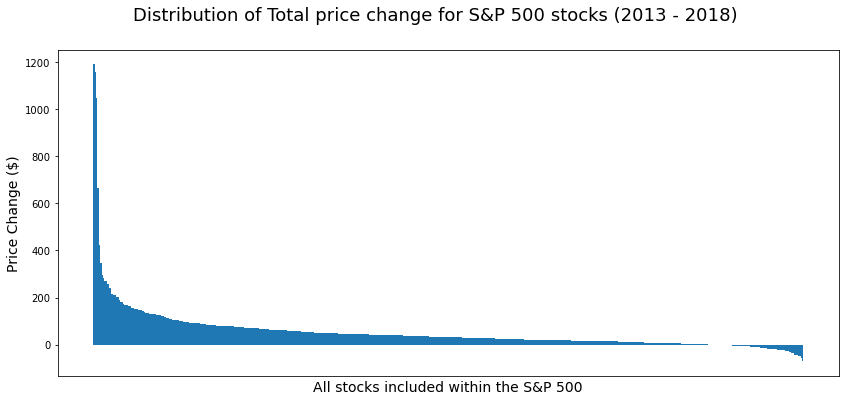

In [9]:
#Data Setup
startdate = min(df_main['Timestamp'])
enddate = max(df_main['Timestamp'])

df_pricestart = df_main[(df_main['Timestamp'] == startdate)].set_index('Name') #Dataframe of all the starting date stock price values
df_priceend = df_main[(df_main['Timestamp'] == enddate)].set_index('Name') #Dataframe of all the final date stock price values

df_pricediff = df_priceend['close'].subtract(df_pricestart['open'], fill_value=0)
df_pricediff = df_pricediff.sort_values(ascending = False, ignore_index = False)
fig = plt.figure()
plt.bar(df_pricediff.index, width = 1, height = df_pricediff)
fig.suptitle('Distribution of Total price change for S&P 500 stocks (2013 - 2018)', fontsize=18)
plt.xlabel('All stocks included within the S&P 500', fontsize=14)
plt.ylabel('Price Change ($)', fontsize=14)
fig.set_size_inches(14,6)
plt.xticks([])
plt.show()

From this list we can identify which stocks resulted in the best returns. The top 3 for this time period were Priceline group (PCLN), Amazon (AMZN), and Google (GOOGL). Below we look at how the price changed for the best performing stock for the time between 2013 - 2018.   

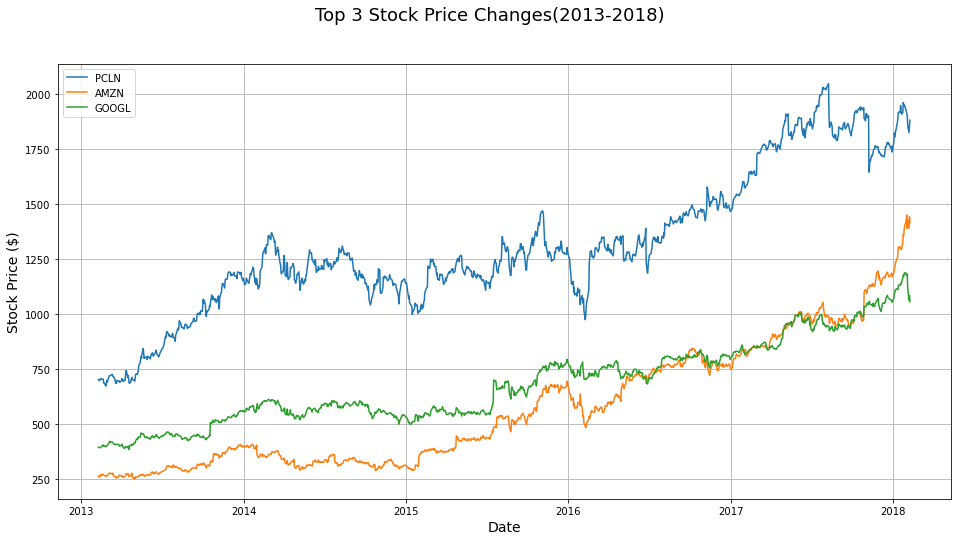

In [10]:
df_PCLN = df_main[df_main['Name'] == 'PCLN']
df_AMZN = df_main[df_main['Name'] == 'AMZN']
df_GOOGL = df_main[df_main['Name'] == 'GOOGL']
fig2 = plt.figure(2)
plt.plot(df_PCLN['Timestamp'], df_PCLN['close'], label = 'PCLN')
plt.plot(df_AMZN['Timestamp'], df_AMZN['close'], label = 'AMZN')
plt.plot(df_GOOGL['Timestamp'], df_GOOGL['close'], label = 'GOOGL')
plt.legend()
fig2.suptitle('Top 3 Stock Price Changes(2013-2018)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price ($)', fontsize=14)
plt.grid(True)
fig2.set_size_inches(16,8)
plt.show()

This chart shows that there is an huge degree of variation and change within high performing stocks. though all of the stock prices have a general upward tracjecotry, there are also many days where there are price decreases. There are also strong periods where there is little to no price change for this high performing stocks. An investor holding these stocks from 2014-2015 would see almost no net change in the value of their stocks even though there are many positive price changes within the year.   

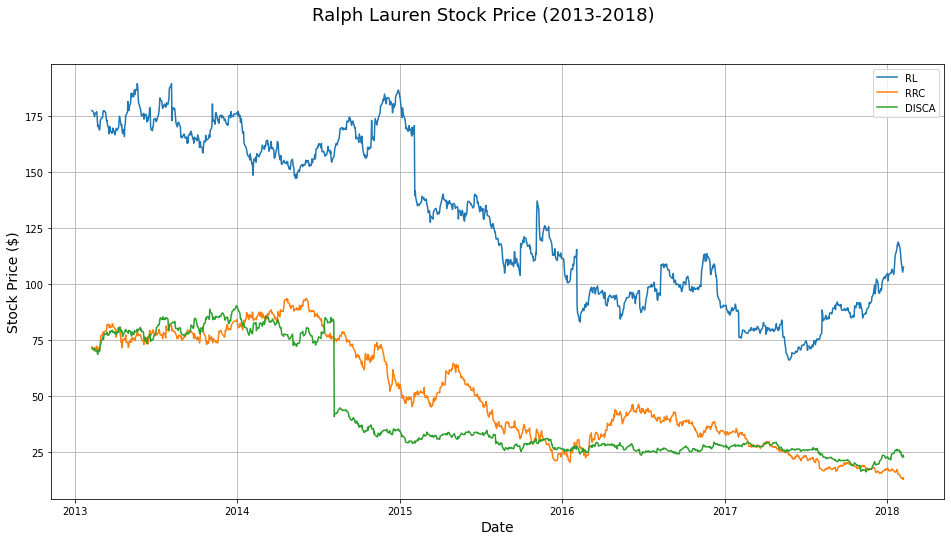

In [11]:
df_RL = df_main[df_main['Name'] == 'RL'] 
df_RRC = df_main[df_main['Name'] == 'RRC']
df_DISCA = df_main[df_main['Name'] == 'DISCA']

fig2 = plt.figure(2)
plt.plot(df_RL['Timestamp'], df_RL['close'], label = 'RL')
plt.plot(df_RRC['Timestamp'], df_RRC['close'], label = 'RRC')
plt.plot(df_DISCA['Timestamp'], df_DISCA['close'], label = 'DISCA')
plt.legend()
fig2.suptitle('Ralph Lauren Stock Price (2013-2018)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price ($)', fontsize=14)
plt.grid(True)
fig2.set_size_inches(16,8)
plt.show()

Looking at the largest net decreases, the worst stock price changes were from Ralph Lauren(RL), Range Resources Corporation (RRC), and Discovery Communications (DISCA). Though the overall trend for these stock prices is negative, there are also periods of positive and neutral price changes. If an investor had chosen one of these stocks to perform a long strategy on, they would have been very dissapointed by the results as they would have lost over half of their money. Even if the investor were to hedge their bets and buy a single stock of every company in the S&P500, they would have only seen a 3.75% return over 5 years. However, the postive and negative price changes within these poor performing stocks begs the question of whether there are better strategies than simply "buy and hold" for the 5 year period.   

### 2. Is there a difference in individual stock performance depending on the day of the week or month?
An alternative investor strategy might be to look at a much shorter investment period.  Rather than holding a few stocks for the entire 5 years, an investor may want to only buy and hold stocks for a single month of the year or day of the week to try and maximize their returns if there is a significant advantage to doing so.

In [12]:
df_main2 = df_main
df_main2['day_of_week'] = df_main2['Timestamp'].dt.day_name() #grouping daily price changes by day of the week and month of the year
df_main2['month_of_year'] = df_main2['Timestamp'].dt.month_name()
df_main2 = df_main.drop(columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'Timestamp']) #dropping columns to save on processing time

fig = px.box(df_main2, x="day_of_week", y="percent_price",
             labels={
                     "day_of_week": "Weekday",
                     "price_delta": "Daily Price Change ($)",
                 },
             title="Daily Price Changes for Day of the Week")
fig.show()


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['price_delta', 'day_of_week', 'month_of_year'] but received: percent_price

The boxplot shows that there is essentially no difference in the price changes for each day of the week. However, this plot is useful for investors as it shows the median price change for a given day is on average negative. This is a surprising result as for any given day, a random stock is more likely to go down than it is to increase. The overall trend of these stocks is positive so the days where there are large gains, they are signficantly larger than the average day of loss. This plot shows that in order to achieve higher returns, an investor needs to find a targeted way to buy and sell during the periods where there are big price swings.    

In [13]:
fig = px.box(df_main2, x="month_of_year", y="price_delta",
             labels={
                     "month_of_year": "Month",
                     "price_delta": "Daily Price Change ($)",
                 },
             title="Daily Price Changes for Months of the Year")
fig.update_yaxes(range=[-30, 30])
fig.show()

Looking at the price changes by month shows that the stocks in the S&P 500 have an average daily price change of around 0. The median price change is similar to the daily price change as the overal trend for the whole index is negative. However, the suprising result from this analysis is that the median price change for December and January is positive.  For an investor with no knowledge of the stocks looking to invest, they would perform better on average if they bought at the start of December and sold at the end of the month or in January.  This result is not seen in any other month.  

### 3. What is the stock with the highest average volatility and highest average return?

In [14]:
#get a list of stocks that have complete 5 years period 
stock_name_list =pd.DataFrame(df_main.loc[df_main['date'] == '2013-02-08']['Name'])
#filter out the stocks that don't have 5 years period
stocks_merge_df = pd.merge(df_main, stock_name_list, on = 'Name', how = 'right')
#calculate each stock standard deviation 
stocks_sds = pd.DataFrame(stocks_merge_df.groupby(['Name'])['close'].std())
#change the calculated column name to 'standard deviation'
stocks_sds.rename(columns={'close': 'standard deviation'}, inplace = True)
#change index 'Name' to column
stocks_sds = stocks_sds.reset_index()

#calculate each stock mean 
stocks_means = pd.DataFrame(stocks_merge_df.groupby(['Name'])['close'].mean())
#change the calculated column name to 'mean'
stocks_means.rename(columns={'close': 'mean'}, inplace = True)
#change index 'Name' to column
stocks_means = stocks_means.reset_index()

#merge standard deviation dataframe and mean dataframe
stocks_sd_mean = pd.merge(stocks_sds, stocks_means, on = 'Name', how = 'left')
#calculate ratio of standard deviation to mean
stocks_sd_mean['ratio_sd_mean'] = stocks_sd_mean['standard deviation'] / stocks_sd_mean['mean']
#calculate ratio of (mean + standard deviation) to mean
stocks_sd_mean['mean_plus_sd'] = 1 + stocks_sd_mean['ratio_sd_mean']
#calculate ratio of (mean - standard deviation) to mean
stocks_sd_mean['mean_minus_sd'] = 1 - stocks_sd_mean['ratio_sd_mean']
stocks_sd_mean['ratio_mean_mean'] = stocks_sd_mean['mean'] / stocks_sd_mean['mean']
#sort the list by ratio of sd to mean in descending order
stocks_sd_mean = stocks_sd_mean.sort_values(by = ['ratio_sd_mean'], ascending = False)
display(stocks_sd_mean[0:9])
# plot the candlestick plot
fig_sd_mean = go.Figure(data=[go.Candlestick(x=stocks_sd_mean[0:9]['Name'],
                                     open=stocks_sd_mean[0:9]['ratio_mean_mean'],
                                     high=stocks_sd_mean[0:9]['mean_plus_sd'],
                                     low=stocks_sd_mean[0:9]['mean_minus_sd'],
                                     close=stocks_sd_mean[0:9]['ratio_mean_mean'])])
fig_sd_mean.update_layout(title = 'Top 10 Volatile Stocks')
fig_sd_mean.show()

Name  standard deviation        mean  ratio_sd_mean  mean_plus_sd  \
325   NVDA           59.624642   56.369368       1.057749      2.057749   
31     AMD            3.971779    5.601863       0.709010      1.709010   
90     CHK            9.296515   13.681326       0.679504      1.679504   
26    ALGN           53.713227   83.664518       0.642007      1.642007   
131  DISCA           24.191738   43.860434       0.551562      1.551562   
51    AVGO           71.416222  130.745677       0.546222      1.546222   
313   NFLX           50.716019   94.906152       0.534381      1.534381   
132  DISCK           21.950500   41.268041       0.531901      1.531901   
144     EA           30.649018   61.615535       0.497424      1.497424   

     mean_minus_sd  ratio_mean_mean  
325      -0.057749              1.0  
31        0.290990              1.0  
90        0.320496              1.0  
26        0.357993              1.0  
131       0.448438              1.0  
51        0.453778              1.0  
313       0.465619              1.0  
132       0.468099              1.0  
144       0.502576              1.0

Based on the table and the chart above there are a few stocks that have especially high volatitlies in their stock prices. For example, investors can potentially lose their entire investment on NVDA, which has ratio of standard deviation to mean 1.057749. However, does it mean that stocks with high volatility are bad investment? Let us compare the top 10 highest volatility stocks with top 10 best performers and top 10 worst performers.   

In [15]:
begin_2013 =  '2013-02-08'
end_2018 = '2018-02-07'

#get open price for 2013
stocks_2013 =  pd.DataFrame(stocks_merge_df.loc[stocks_merge_df['date'] == begin_2013])
#get close price for 2018
stocks_2018 =  pd.DataFrame(stocks_merge_df.loc[stocks_merge_df['date'] == end_2018])
#merge two dataframes, stocks_2013 and stock_2018
stocks_2013_2018 = pd.merge(stocks_2013, stocks_2018[['Name', 'close']], on = 'Name')

stocks_2013_2018.rename(columns={'open': 'open_2013'}, inplace = True)
stocks_2013_2018.rename(columns={'close_y': 'close_2018'}, inplace = True)

#calculate total return for each stock between 2013 and 2018
stocks_2013_2018['total_return'] = (stocks_2013_2018['close_2018'] - stocks_2013_2018['open_2013']) / stocks_2013_2018['open_2013']
#calculate average yearly return for each stock
stocks_2013_2018['average_yearly_return'] = stocks_2013_2018['total_return'] / 5
#sort the stocks by average yearly return in descending order
stocks_2013_2018 = stocks_2013_2018.sort_values(by = ['average_yearly_return'], ascending = False)

# plot the scatter plot for top 10 best performers
fig_average_top10 = px.scatter(stocks_2013_2018[0:9], x = 'Name', y = 'average_yearly_return', color = 'Name', size = stocks_2013_2018[0:9]['average_yearly_return'].abs(), 
                       hover_name = 'Name', title = "Top 10 Best Average Yearly Return Stocks between 2013 - 2018")
fig_average_top10.show()


In [16]:
#sort the stocks by average yearly return ascending 
stocks_2013_2018 = stocks_2013_2018.sort_values(by = ['average_yearly_return'], ascending = True)
# plot the scatter plot for top 10 best performers 
fig_average_bot10 = px.scatter(stocks_2013_2018[0:9], x = 'Name', y = 'average_yearly_return', color = 'Name', size = stocks_2013_2018[0:9]['average_yearly_return'].abs(), 
                       hover_name = 'Name', title = "Top 10 Worst Average Yearly Return Stocks between 2013 - 2018")
fig_average_bot10.show()

It is very interesting to see that stocks with highest volatility such as NVDA, NFLX, ALGN, and EA are in the top 10 performers list. Also, stocks such as CHK, DISCA AND DISCK are in the top 10 worst performers list. This result confirms the sentiment that a stock with high risk (high volatility) the greater the potential for a higher return. Top 10 or 20 highest volatility stocks list provides investors a good starting point to pick high return stocks, but investors still need to do their own research on the companies to ensure they understand the company business and make the right decision.    

Another use of standard deviation and mean within this dataset is to plot Bollinger Bands. This statistic is one of the most commonly used tool to predict price movement or trends. 

In [17]:
#Bollingerbands plot for each stock
#create an interaction to choose a stock and plot Bollingerbands
@interact(Stock_Ticker = stockname)
def bollingerbands_plot(Stock_Ticker = stockname):
    #boolean index to select the stock from the main dataframe
    stock_index = df_main['Name'] == Stock_Ticker
    #retrieve the rows for the selected stock 
    selected_stock = df_main.loc[stock_index]
    #ensure the date is in order
    selected_stock = selected_stock.sort_values(by = ['date'], ascending = True)
    
    #drop unwanted columns to reduce memory usage
    selected_stock.drop(['open', 'high','low', 'volume'], axis=1, inplace=True)
    #set column 'date' as index
    selected_stock = selected_stock.set_index('date')
    #calculate 20 day moving average of close price
    selected_stock['20d_MA'] = selected_stock['close'].rolling(window = 20).mean()
    #calculate 20 day standard deivation of close price
    selected_stock['20d_SD'] = selected_stock['close'].rolling(window = 20).std()
    #set upper bound to 2 * standard deviation away from 20 day moving average
    selected_stock['upper band'] = selected_stock['20d_MA'] + selected_stock['20d_SD'] * 2
    #set lower bound to 2 * standard deviation away from 20 day moving average
    selected_stock['lower band'] = selected_stock['20d_MA'] - selected_stock['20d_SD'] * 2
    selected_stock = selected_stock.dropna()
 
    #plot Bollingerbands for the stock
    fig_bollingerbands = go.Figure()
    fig_bollingerbands.add_trace(go.Scatter(y = selected_stock['close'], x = selected_stock.index, mode = 'lines', name = 'Close Price'))
    fig_bollingerbands.add_trace(go.Scatter(y = selected_stock['20d_MA'], x = selected_stock.index, mode = 'lines', name = '20 Day MA'))
    fig_bollingerbands.add_trace(go.Scatter(y = selected_stock['upper band'], x = selected_stock.index, mode = 'lines', name = 'Upper Band'))
    fig_bollingerbands.add_trace(go.Scatter(y = selected_stock['lower band'], x = selected_stock.index, mode = 'lines', name = 'Lower Band'))
    
    fig_bollingerbands.update_layout(title = Stock_Ticker + ' Bollingerbands Plot', xaxis_title = 'Date', yaxis_title = 'Price(USD)')
    fig_bollingerbands.show()
    return


interactive(children=(Dropdown(description='Stock_Ticker', options=('AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT'…

The Bollingerbands plot shows that the stock close price normally bounce between the upper band and the lower band. When the price is over the upper bound, the stock is probably considered to be overbought and the stock is due for a pull back. For example, NVDA close price was 136.81 on May 16 2017, which was over 20 day moving average, and it dropped to 127.72 on May 17 2017. When the price is lower than the lower band, the stock is probably considered to be oversold and is due for a comeback. When the bands tighten during low volatility, the price of stock has a high chance of making a sharp price move in either direction. For example, NVDA stock price jumped to 121.29 on May 10 2017 from 102.94 on May 9 when both upper band and lower band started tightening. When the bands widens by large amount, this may suggest that the volatility increases and any exisitng trend may end soon. The Bollingerbands is a very useful tool for inverstors to identify potential entry points or profit targets for stocks.        

### 4. How are stock prices and volume of trades related?
What will be happened if the volume goes down 1% compare to last day?
Volume is a kind of signal to show how investors confidence in it and how strong the stock`s motivation.

In [18]:
# Linear Regression and Bootstrapping simulation
# stock price change as a percentage of its total value
# stock volume change as a percentage of total volume
df_main['percent_price'] =  df_main['price_delta'] / df_main['open']
df_main['percent_volume'] = df_main['volume'].diff() / df_main['volume']

def predict_model(predict_data):
    X = predict_data['percent_volume'].values.reshape(-1,1)
    Y = predict_data['percent_price'].values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(X,Y)      
    X = sm.add_constant(predict_data['percent_volume'])
    Y = predict_data['percent_price']
    est = sm.OLS(Y,X).fit()
    A = [est.params]
    #print('The Linear Model is Y = {:.05} + {:0.05}X'.format(reg.intercept_[0],reg.coef_[0][0]))  
    #print(est.summary())
    return A    

bins = np.array([-500,0,0.00000000001])
placings = np.digitize(df_main['percent_price'], bins)
label_map = {1: 'Declined',2:'Flat', 3:'Increased'}
bins_cat = [label_map[x] for x in placings]
df_main['CAT'] = bins_cat



@interact(STOCK = stockname)
def linear_regression(STOCK = stockname):    
    stock_requried6 = df_main['Name'].map(lambda x : x==STOCK)
    all_requried6 = df_main[stock_requried6]   
    
    # Price changes vs volume plot

    fig = px.scatter(all_requried6, x ="percent_volume", y="percent_price", color="CAT",
                     color_discrete_map = {'Declined':'#31a354', 'Flat' : '#636363', 'Increased' : '#e6550d'},
                     category_orders = {'CAT':['Declined','Flated','Increased']},
                     color_discrete_sequence =["#31a354",'#636363','#e6550d'],
                     size='volume')
    fig.update_layout(title = 'Percent changes of price and volume')
    fig.show()     
    
  
    # Linear regression simulation
    global predict_data
    predict_data = all_requried6.dropna(axis = 0,subset = ['percent_price','percent_volume'])
    predict_data = predict_data.reset_index()
    bootstrap = 1000
    cor_boot = []
    a_boot = []
    b_boot = []
    ymean_boot = []
    loop_value = []
    data_boot = []
    xvalue = 50000000
    training_data = pd.DataFrame(columns = ['a_boot','b_boot','ymean_boot'])
    for i in range(bootstrap):
 
        data_boot = predict_data.sample(n=30,replace = True)
        loop_value = loop_value + predict_model(data_boot)
        a_boot = a_boot + [loop_value[i][0]]
        b_boot = b_boot + [loop_value[i][1]]
        ymean_boot += [a_boot[i] + (b_boot[i]*xvalue)]
    training_data['b_boot'] = b_boot
    training_data['a_boot'] = a_boot
    training_data['ymean_boot'] = ymean_boot  
    global a
    a = training_data['a_boot'].mean()
    global b
    b = training_data['b_boot'].mean()
    predict_data['simulated_percent'] =  predict_data['percent_volume'].apply(lambda x: a + b * x)
    print('The Linear Model is Y =  %f + %F * X' % (a,b)) 
    fig = make_subplots(rows=3, cols=1)
    trace_0 = go.Histogram(x=training_data['a_boot'],name = 'a_boot')
    trace_1 = go.Histogram(x=training_data['b_boot'],name = 'b_boot')
    trace_2 = go.Histogram(x=training_data['ymean_boot'],name = 'ymean_boot')  
    fig.append_trace(trace_0, 1, 1)
    fig.append_trace(trace_1, 2, 1)
    fig.append_trace(trace_2, 3, 1)    
    fig.update_layout(title = 'Bootstrap of A,B and Average Y',legend_title = 'Parameter')
    fig.show()
    return       


interactive(children=(Dropdown(description='STOCK', options=('AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN'…

In [19]:
# Comparision of simulated and actual data

def simulated(predict_data):    
    predict_data['simulated_percent'] =  predict_data['percent_volume'].apply(lambda x: a + b * x)    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = predict_data['date'], y = predict_data['simulated_percent'],
                    mode='markers',
                    name='Simulated price change'))    
    fig.add_trace(go.Scatter(x = predict_data['date'], y = predict_data['percent_price'],
                    mode='markers',
                    name='Actual price change'))
    fig.update_layout(title = 'Actual and simulated data')
    fig.show()
    return

simulated(predict_data)

From the linear regression, we may roughly infer that the price may not have motivation to go up on average if volume is getting down, another means that investor does not have enough confidence in this stock. 

Well, we do have other method to evaluate the trend or predict it, that is also a common way to check how is the stock in a different perspective. So is a moving stock price average a better predictor of stock performance? 

### 5. Is a moving stock price average a better predictor of stock performance? 

In [24]:
# MACD 

df_main['price_delta_abs'] = abs(df_main['price_delta'])

@interact(STOCK_TSI = stockname)
def MACD(STOCK_TSI = stockname):                       

    stocks_MA = df_main[df_main['Name'] == STOCK_TSI].reset_index()
    stocks_MA = pd.concat([stocks_MA,pd.DataFrame(columns = ['EMA1','EMA2','ln9','hn9','k','d','j','MACD','DIF','DEA'])],sort = False)
    
    # Calculation of KDJ index
    ln9 = stocks_MA['low'].rolling(9,min_periods = 9).min()
    ln9.fillna(value = stocks_MA['low'].expanding().min(), inplace = True)           
    hn9 = stocks_MA['high'].rolling(9,min_periods = 9).max()
    hn9.fillna(value = stocks_MA['high'].expanding().min(),inplace = True)
    rsv = (stocks_MA['close'] - ln9) / (hn9 - ln9) * 100

    stocks_MA['k'] = rsv.ewm(com=2).mean()
    stocks_MA['d'] = stocks_MA['k'].ewm(com=2).mean()
    stocks_MA['j']  = 3 * stocks_MA['k'] - 2 * stocks_MA['d']
    
    # Calculate MACD
    stocks_MA.loc[25:,'EMA1']  = np.convolve(stocks_MA['close'], np.ones(26)/26, 'valid')
    stocks_MA.loc[11:,'EMA2'] = np.convolve(stocks_MA['close'], np.ones(12)/12, 'valid')
    stocks_MA['DIF'] = stocks_MA['EMA2'] - stocks_MA['EMA1']
    stocks_MA.loc[8:,'DEA'] = np.convolve(stocks_MA['DIF'], np.ones(9)/9, 'valid')
    stocks_MA['MACD'] = (stocks_MA['DIF'] - stocks_MA['DEA'] ) * 2 
    
    # Color MACD
    color = np.array([])
    Positive = stocks_MA[stocks_MA['MACD'] >=0 ]
    color = np.array(['rgb(255,255,255)'] * stocks_MA['MACD'].shape[0])
    color[stocks_MA['MACD'] < 0 ] = '#66bd63'
    color[stocks_MA['MACD'] >= 0] = '#d73027'    
    
    # Plot KDJ and MACD 

    fig = go.Figure(data = [go.Scatter(x = stocks_MA['date'], y = stocks_MA['DEA'],line = dict(color="#de2d26"),name = 'DEA'),
                            go.Scatter(x = stocks_MA['date'], y = stocks_MA['DIF'],line = dict(color="#2b8cbe"),name = 'DIF'),
                            go.Bar(x = stocks_MA['date'], y = stocks_MA['MACD'],name = 'MACD',marker = dict(color=color.tolist())),
                            go.Scatter(x = stocks_MA['date'], y = stocks_MA['k'],line = dict(color="#fec44f"), mode = 'lines', name = 'K Line'),
                            go.Scatter(x = stocks_MA['date'], y = stocks_MA['d'],line = dict(color="#2ca25f"), mode = 'lines', name = 'D Line'),
                            go.Scatter(x = stocks_MA['date'], y = stocks_MA['j'],line = dict(color="#8856a7"), mode = 'lines', name = 'J Line')
                            ])
    fig.update_layout(title = 'KDJ & MACD ',legend_title = 'Index')
    fig.show()
    
    
    return

interactive(children=(Dropdown(description='STOCK_TSI', options=('AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', '…

To predict the price trend, the combination of MACD and KDJ is one of most valuable way. These two keys can help investor to identify when is the best time to buy or sell, as well as how is the price trend going. It is a hint of risky if KDJ is around 80, but it is safe if around 20, but KDJ is a short term index, so with a middle-long term index MACD, we can predict that the price trend in a particular peirod. For example, it is a strong signal to buy and the price will go up definitely if there is crossline of MACD when green bar gets end, as well as a crossline of KDJ exists. 

###  6. What is the best percentage gain for an individual stock in a single day between 2013 - 2018 within the S&P 500?

In [45]:
#calculate percent change in stock price
df_main['percent_change'] = round((df_main['price_delta'] / df_main['open']), 3)
#find the best percentage gain on a single day
print(df_main.loc[df_main['percent_change'] == df_main['percent_change'].max()])
#find the worst percentage lose on a signle day
print(df_main.loc[df_main['percent_change'] == df_main['percent_change'].min()])

              date   open     high     low   close   volume Name  price_delta  \
113362  2014-05-19  18.77  33.9525  33.695  33.895  1078888  CHD       15.125   

        Timestamp  percent_price  percent_volume        CAT  percent_change  
113362 2014-05-19       0.805807        0.101968  Increased           0.806  
              date   open    high     low  close   volume Name  price_delta  \
349476  2016-05-19  35.19  35.785  35.085  17.87  1231722  LNT       -17.32   

        Timestamp  percent_price  percent_volume       CAT  percent_change  
349476 2016-05-19      -0.492185        0.138078  Declined          -0.492  


In [48]:
#sort the list by percent change in descending order
df_main_sorted = df_main.sort_values(by = ['percent_change'], ascending = False)
#drop rows that have NAN values
df_main_sorted = df_main_sorted.dropna()
#get the top 10 best percentage gain stocks
df_main_top10 = pd.DataFrame(df_main_sorted[0:10])
#plot the top 10 best single day gain stocks
fig_top10 = px.scatter(df_main_top10, x = 'date', y = 'percent_change', color = 'Name', size = df_main_top10['percent_change'].abs(), 
                       hover_name = 'Name', title = "Top 10 Best Percentage Gain on a single day between 2013 - 2018")
fig_top10.show()

In [49]:
#sort the list by percent change in ascending order
df_main_sorted = df_main.sort_values(by = ['percent_change'], ascending = True)
#get the top 10 worst percentage gain stocks
df_main_bot10 = pd.DataFrame(df_main_sorted[0:10])
fig_top10 = px.scatter(df_main_bot10, x = 'date', y = 'percent_change', color = 'Name', size = df_main_bot10['percent_change'].abs(), 
                       hover_name = 'Name', title = "Top 10 Worst Percentage Drop on a single day between 2013 - 2018")
fig_top10.show()

Based on the plots above, the best single day percentage gain obetween 2013 and 2018 was 80.6% on May 19, 2014 from the CHD stock. This is astounding return for a single day and especially impressive for a large capital stock in the S&P 500. On the other hand, LNT has the worst percentage lose 49.2% on May 19, 2016. This would have been a devestating loss for a investor as they would have lost almost half of their investment in a single day. Both charts show that year 2016 has 7 out of top 10 best single day gain and 7 out of top 10 worst single day loses, this may suggest that the stock market in 2016 was very volatile and abnormal compared to other years. The scatter plots show that CHK stock has 3 out of top 10 best single day percentage gains and has 2 out of top 10 worst single day percentage loses. This goes to show that CHK is one of the top 10 most volatile stocks between 2013 and 2018. 

### Conclusion

This initial investigation has revealed and confirmed several trends within the S&P 500.  This investigation was not meant to give firm trading advice but to give anyone who buys and sells stock general guidelines about the nature of the S&P 500. By pursuing a strategy of buying a stock and then waiting until the price is higher before selling, a person can generate wealth for themselves. Through the use of visualizations and analysis we have shown that despite the huge range and variability in stock prices, there are general trends that can be used to maximize returns. The first general trend outlined is that on a long-term scale, the potential return is greatly reduced. Stock price changes are fairly consistent most of the time and result in no net change over many months. By figuring out when periods of rapid change (by picking highly volatile stocks or only looking at the end of the year), a trader can generate far more wealth than simply waiting for the stock price to increase. This said, we also identified that most of the time stock prices typically go down in price. This means that someone who randomly picks a stock to buy and sell on a single day will most likely lose money. We also outlined a relationship between stock price and the volume of stocks being traded.  This relationship can be used as a guideline for identifying when big price changes are occuring within a specific stock. Moreover, we also showed that while highly volatile stocks can generate the best returns, they are also the most risky as they can also lead to the greatest loss of investment. This effect commonly called the Beta of the stock is a function of the standard deviation and should be considered when picking which stocks to buy.


Possible next steps to this investigation include:

 1. We have almost exclusively looked at 'buy and hold' strategies in this analysis and haven't discussed how a person may 'short' a stock or make money off price decreases.  This approach and many others have their advantages and disadvantages compared to the long strategy we focused on in this initial investigation.
 2. We could also look to see if these trends are more pronounced by specifying criteria for different groups. Many investors look at investing only in certain economic sectors or group stocks by specific parameters to make their planned strategy more likely to succeed. 
 3. We also need to start incorporating a lot more information into generalizing these trends as stock prices are typically a funciton of company financial fundamentals and incorporating these values into our models will likely improve their usefulness. 
 
 
 ##References
 
Cory Mitchell. (2017) *Wilder's DMI (ADX)* [Online]. Available at: https://www.investopedia.com/terms/w/wilders-dmi-adx.asp (Accessed: 8 October 2020)

Raul Leote de Carvalho, Xiao Lu and Pierre Moulin. (2012) *Demystifying Equity Risk–Based Strategies.* The Journal of Portfolio Management: 38 (3) 56-70